In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Data = pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [2]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
Data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
# itseems the column named "oldpeak" has null values

In [5]:
Data['oldpeak'] = Data['oldpeak'].fillna(Data['oldpeak'].median())

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
Data.describe().round(3)

,age,trestbps,chol,thalch,oldpeak,num
count,908.000,908.000,908.000,908.000,908.000,908.000
mean,53.792,133.431,201.485,135.957,0.865,1.009
std,9.158,20.402,112.098,26.805,1.060,1.144
min,29.000,0.000,0.000,60.000,-2.600,0.000
25%,47.750,120.000,176.750,118.000,0.000,0.000
50%,54.000,130.000,224.000,138.000,0.500,1.000
75%,60.000,144.000,270.000,156.000,1.500,2.000
max,77.000,200.000,603.000,202.000,6.200,4.000


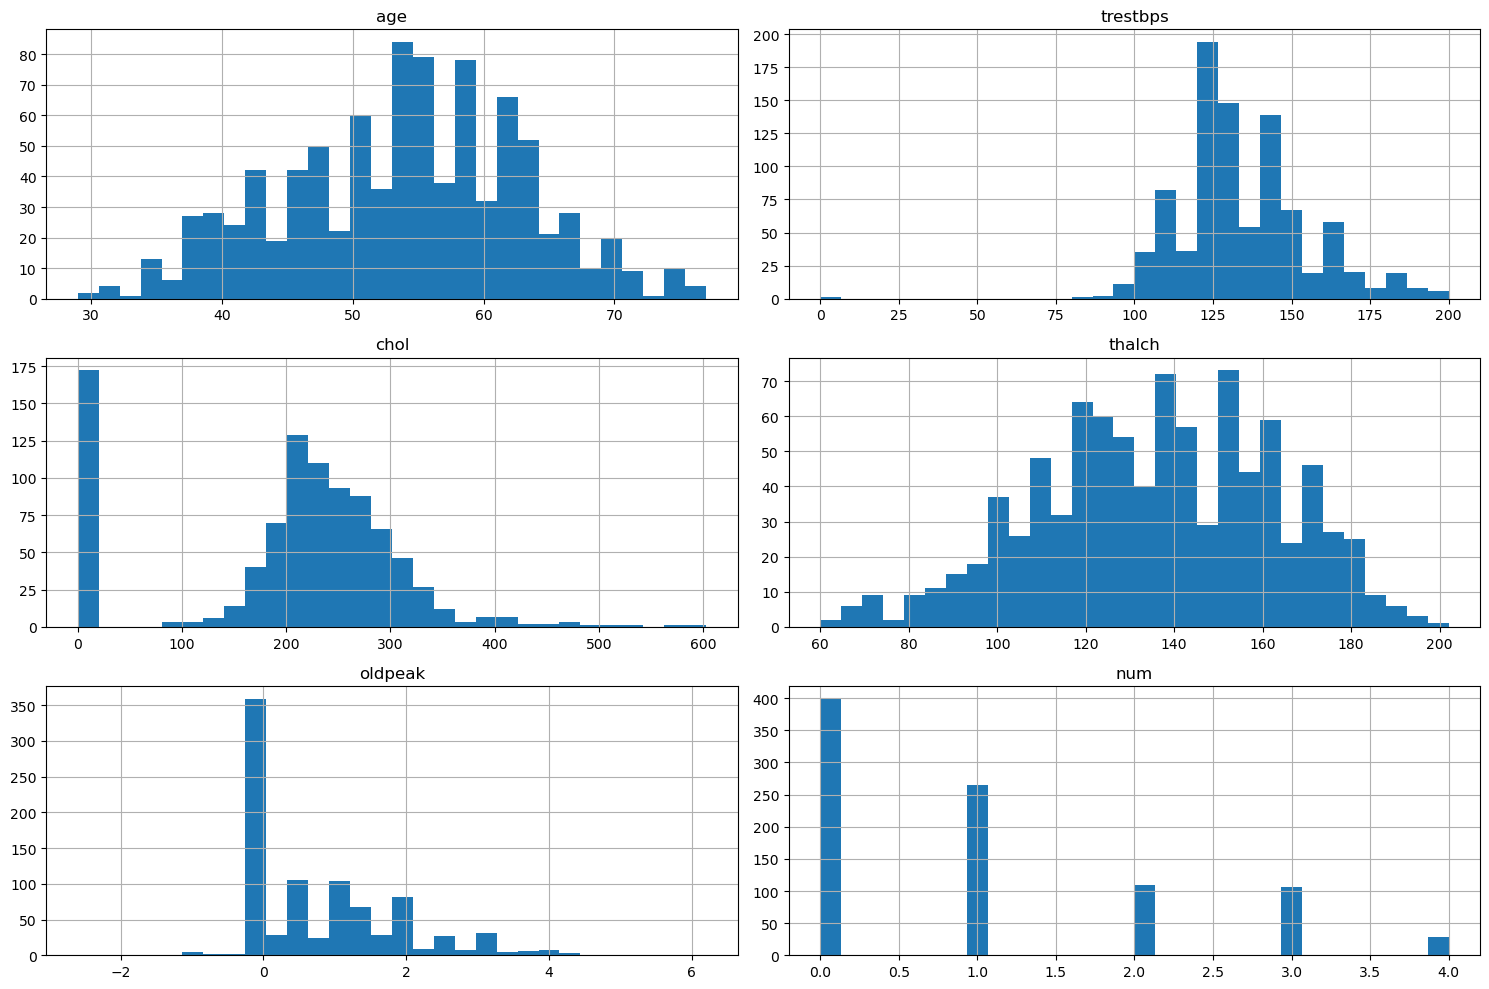

In [8]:
Data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

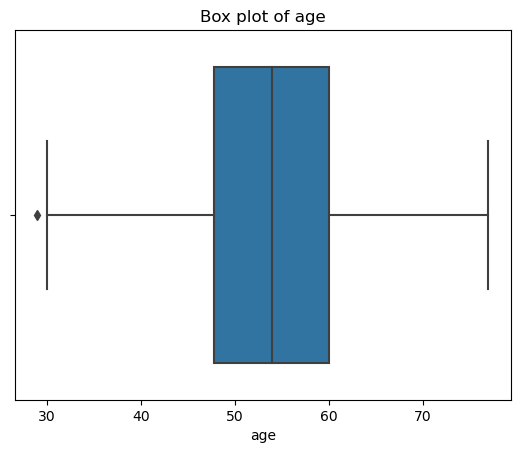

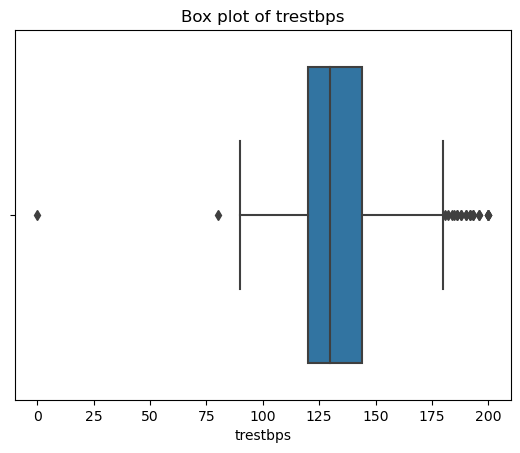

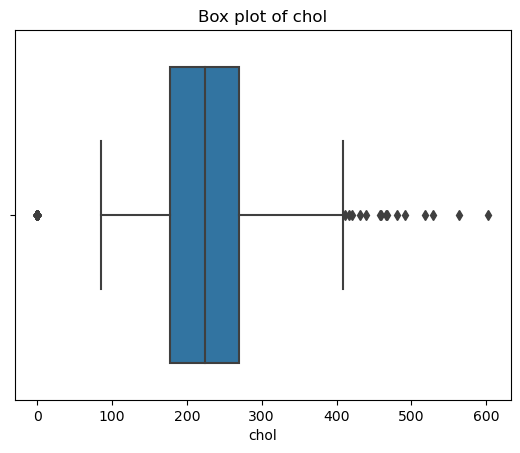

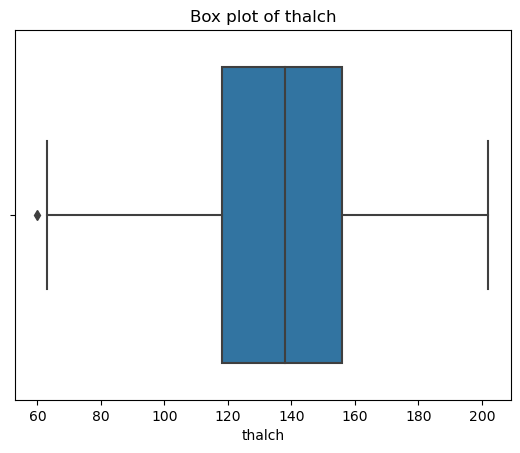

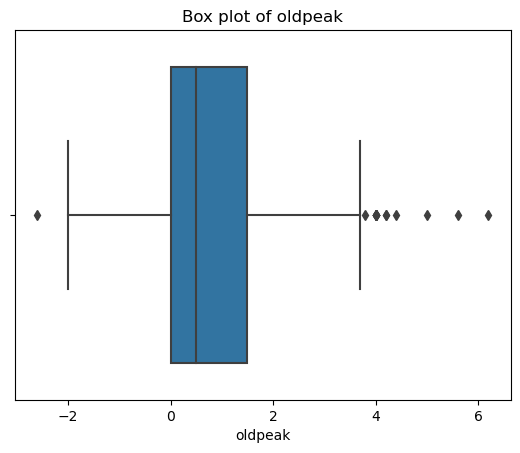

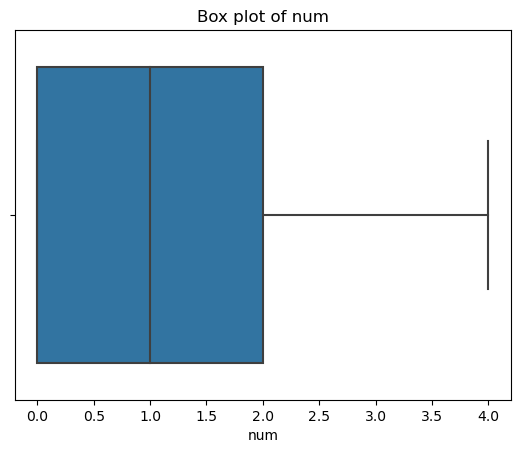

In [9]:
numeric_cols = Data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    sns.boxplot(x=Data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [10]:
numeric_columns = ['thalch', 'trestbps', 'chol', 'age','oldpeak'] 

for col in numeric_columns:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Data[col] = Data[col].clip(lower, upper)

C:\Users\JOSHUAVIJAYA\AppData\Local\Temp\ipykernel_19892\3955176211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')


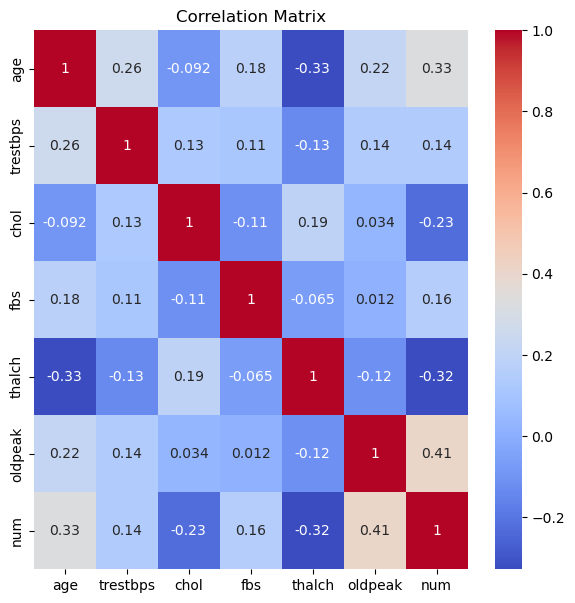

In [11]:
# Correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# As age increases, heart diseases increases. old peak and num have positive correlation, 
# old peak and age has postitve correlation.

In [13]:
Data['sex'] = Data['sex'].map({'Male': 1, 'Female': 0})

In [14]:
#converting the categorical data to numerical data

In [15]:
Data['fbs'] = Data['fbs'].astype(int)
Data['exang'] = Data['exang'].astype(bool).astype(int)

In [16]:
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1,typical angina,145,233.000,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41.0,1,atypical angina,135,203.000,0,normal,132,0,0.0,flat,fixed defect,0
2,57.0,1,asymptomatic,140,192.000,0,normal,148,0,0.4,flat,fixed defect,0
3,52.0,1,typical angina,118,186.000,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57.0,1,asymptomatic,110,201.000,0,normal,126,1,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1,asymptomatic,125,36.875,0,normal,120,0,1.5,upsloping,reversable defect,4
904,62.0,1,asymptomatic,166,170.000,0,st-t abnormality,120,1,3.0,flat,reversable defect,4
905,56.0,1,non-anginal,170,36.875,0,lv hypertrophy,123,1,2.5,downsloping,normal,4
906,56.0,1,non-anginal,144,208.000,1,st-t abnormality,105,1,0.5,downsloping,fixed defect,4


In [17]:
Data_encoded = pd.get_dummies(Data, columns=['cp', 'restecg','slope', 'thal'], drop_first=True)

In [18]:
Data_encoded

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,1,145,233.000,1,150,0,2.3,0,0,0,1,0,0,0,0,0,0
1,41.0,1,135,203.000,0,132,0,0.0,0,1,0,0,1,0,1,0,0,0
2,57.0,1,140,192.000,0,148,0,0.4,0,0,0,0,1,0,1,0,0,0
3,52.0,1,118,186.000,0,190,0,0.0,0,0,0,1,0,0,1,0,0,0
4,57.0,1,110,201.000,0,126,1,1.5,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1,125,36.875,0,120,0,1.5,4,0,0,0,1,0,0,1,0,1
904,62.0,1,166,170.000,0,120,1,3.0,4,0,0,0,0,1,1,0,0,1
905,56.0,1,170,36.875,0,123,1,2.5,4,0,1,0,0,0,0,0,1,0
906,56.0,1,144,208.000,1,105,1,0.5,4,0,1,0,0,1,0,0,0,0


In [19]:
Data_encoded['target'] = Data_encoded['num'].apply(lambda x: 1 if x > 0 else 0)
Data_encoded.drop('num', axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Data_encoded.drop('target', axis=1))
X = pd.DataFrame(scaled_features, columns=Data_encoded.drop('target', axis=1).columns)
y = Data_encoded['target']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6978021978021978
Precision: 0.7209302325581395
Recall: 0.6666666666666666
F1 Score: 0.6927374301675978
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70        89
           1       0.72      0.67      0.69        93

    accuracy                           0.70       182
   macro avg       0.70      0.70      0.70       182
weighted avg       0.70      0.70      0.70       182



In [22]:
# this model predicts 70% accuracy
# precision is 72% prediction
# Of all actual positive cases, the model correctly identified 67%.
# Model has balanced performance between detecting positive and negative cases.

In [23]:
from sklearn.model_selection import GridSearchCV
parametric_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 4, 10],
    'criterion': ['gini', 'entropy']
}


In [24]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), parametric_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [25]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [26]:
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Optimized F1 Score:", f1_score(y_test, y_pred_best))

Optimized F1 Score: 0.7717391304347826


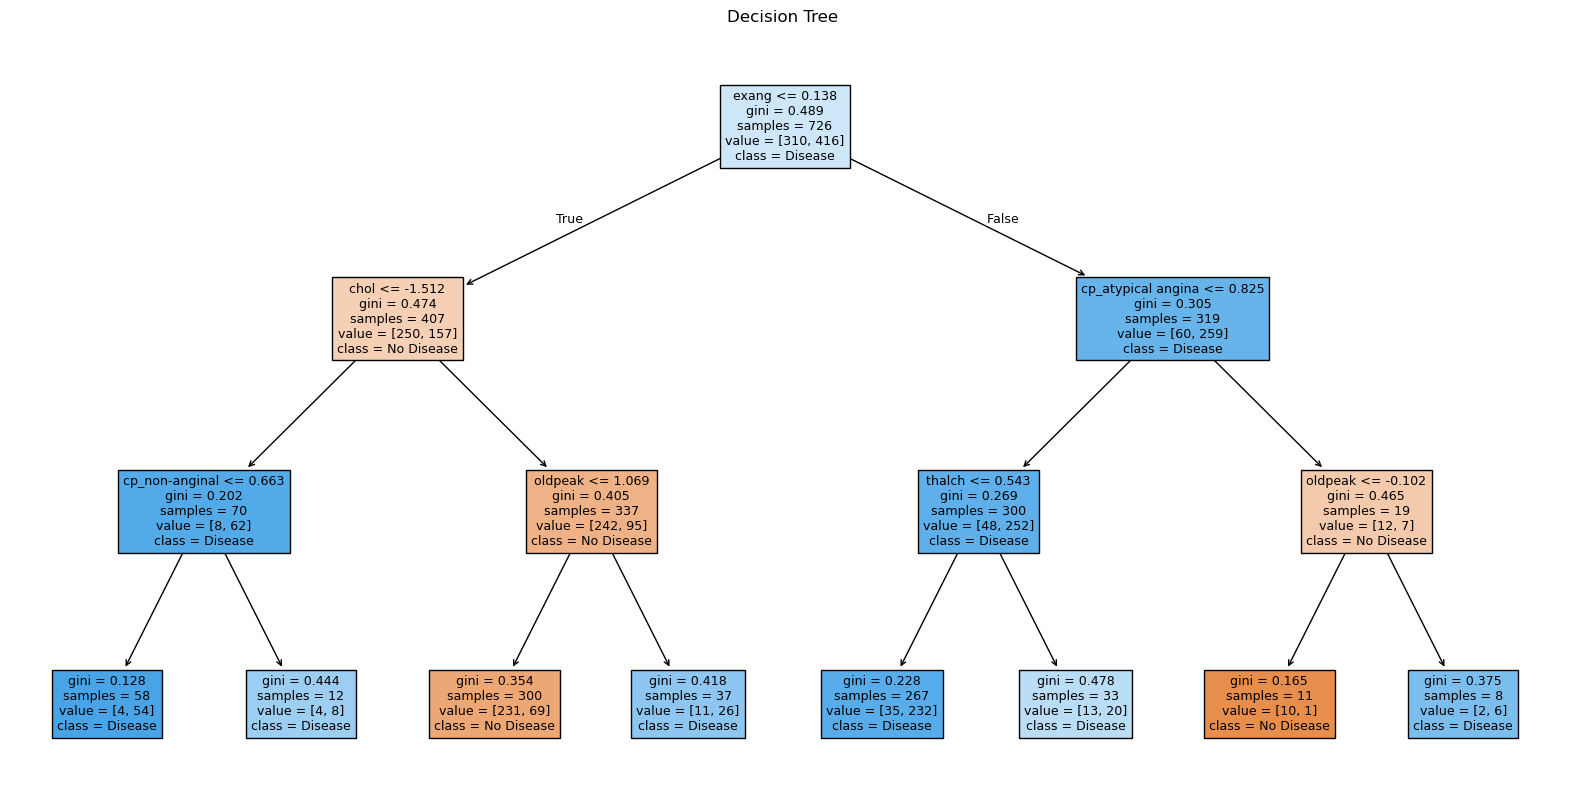

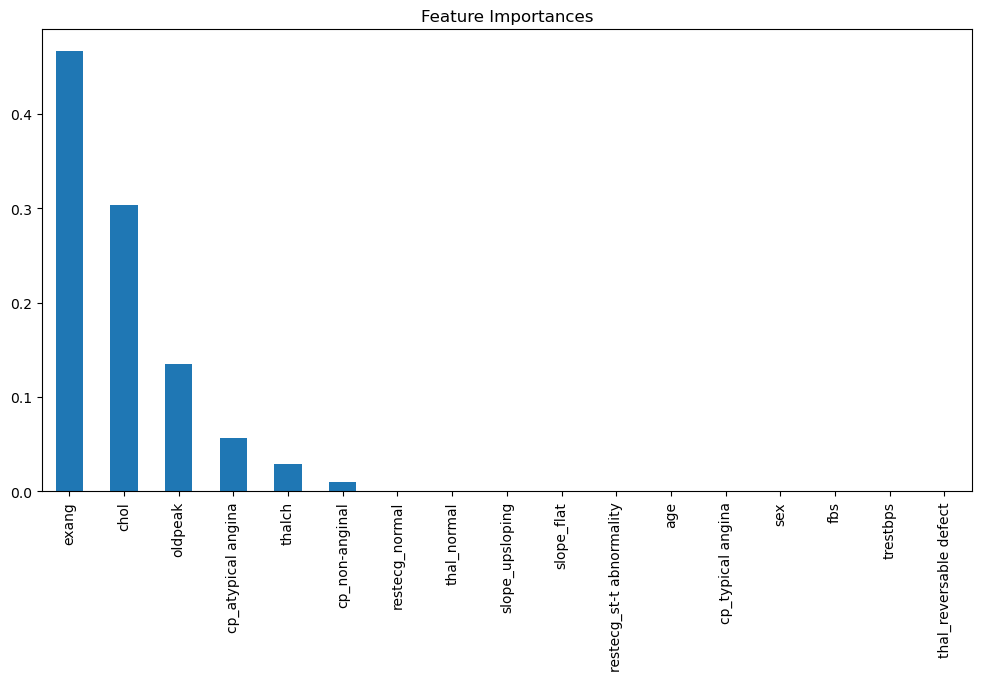

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree ")
plt.show()

feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importances")
plt.show()

In [28]:
# The final model performed well with a reasonable level of accuracy and interpretability.